In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import time

In [ ]:
import io
data = pd.read_excel('Maindata.xlsx')
data.head()

,Zone,Dealer Code,Dealer Name,Transaction No.,Description,Status,Posting Date,IRT,CATEGORY,IRTSTATUS,MPT,MPTSTATUS,Changed On,TRANSACTIONTYPE,Created By,Reported By,Object GUID
0,NaN,NaN,NaN,2000095635,Medium,Open,2022-05-06,0,Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,ANANDSHARMA,NaN,0
1,NaN,NaN,NaN,1000003085,Very High,Open,2022-05-06,0,NaN,NaN,0,NaN,2022-05-06,MG Parts Support,S309PRM0001,NaN,0
2,NaN,NaN,NaN,1000003086,Medium,Open,2022-05-06,0,NaN,NaN,0,NaN,2022-05-06,MG Parts Support,WW14PRM0001,NaN,0
3,NaN,NaN,NaN,2000095644,Very High,Open,2022-05-06,0,After Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,DW02HSR0001,NaN,0
4,NaN,NaN,NaN,2000095646,High,Open,2022-05-06,0,Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,DE04CRE0001,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97125 entries, 0 to 97124
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Zone             95080 non-null  object        
 1   Dealer Code      95080 non-null  object        
 2   Dealer Name      95056 non-null  object        
 3   Transaction No.  97125 non-null  int64         
 4   Description      97118 non-null  object        
 5   Status           97125 non-null  object        
 6   Posting Date     97125 non-null  datetime64[ns]
 7   IRT              97125 non-null  int64         
 8   CATEGORY         92095 non-null  object        
 9   IRTSTATUS        3790 non-null   object        
 10  MPT              97125 non-null  int64         
 11  MPTSTATUS        10610 non-null  object        
 12  Changed On       97125 non-null  datetime64[ns]
 13  TRANSACTIONTYPE  97124 non-null  object        
 14  Created By       97125 non-null  objec

In [ ]:
data.isnull().sum()

Zone                2045
Dealer Code         2045
Dealer Name         2069
Transaction No.        0
Description            7
Status                 0
Posting Date           0
IRT                    0
CATEGORY            5030
IRTSTATUS          93335
MPT                    0
MPTSTATUS          86515
Changed On             0
TRANSACTIONTYPE        1
Created By             0
Reported By         6192
Object GUID            0
dtype: int64

In [ ]:
data.drop(columns=["IRTSTATUS","MPTSTATUS","Object GUID"],axis=1,inplace=True)

In [ ]:
data.columns=["zone","dealer_code","dealer_name","trans_no.","description","status","posting_date","IRT","category","MPT","changed_on","transaction_type","created_by","reported_by"]
data.head()

,zone,dealer_code,dealer_name,trans_no.,description,status,posting_date,IRT,category,MPT,changed_on,transaction_type,created_by,reported_by
0,NaN,NaN,NaN,2000095635,Medium,Open,2022-05-06,0,Sales,0,2022-05-06,MG_MOTORS_Incident,ANANDSHARMA,NaN
1,NaN,NaN,NaN,1000003085,Very High,Open,2022-05-06,0,NaN,0,2022-05-06,MG Parts Support,S309PRM0001,NaN
2,NaN,NaN,NaN,1000003086,Medium,Open,2022-05-06,0,NaN,0,2022-05-06,MG Parts Support,WW14PRM0001,NaN
3,NaN,NaN,NaN,2000095644,Very High,Open,2022-05-06,0,After Sales,0,2022-05-06,MG_MOTORS_Incident,DW02HSR0001,NaN
4,NaN,NaN,NaN,2000095646,High,Open,2022-05-06,0,Sales,0,2022-05-06,MG_MOTORS_Incident,DE04CRE0001,NaN


In [ ]:
data.nunique()

zone                    7
dealer_code           138
dealer_name           135
trans_no.           97124
description             6
status                  9
posting_date          794
IRT                   433
category               11
MPT                   869
changed_on            788
transaction_type        2
created_by            400
reported_by           411
dtype: int64

In [ ]:
data.posting_date.max()

Timestamp('2022-05-06 00:00:00')

In [ ]:
data.posting_date.min()

Timestamp('2020-02-27 00:00:00')

In [ ]:
date_tickets = data.groupby(["posting_date"]).agg({"description":"count"})
date_tickets.reset_index(inplace=True)
date_tickets.head()

,posting_date,description
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


In [ ]:
date_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posting_date  794 non-null    datetime64[ns]
 1   description   794 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.5 KB


In [ ]:
date_tickets.description.max()

321

In [ ]:
date_tickets.description.min()

1

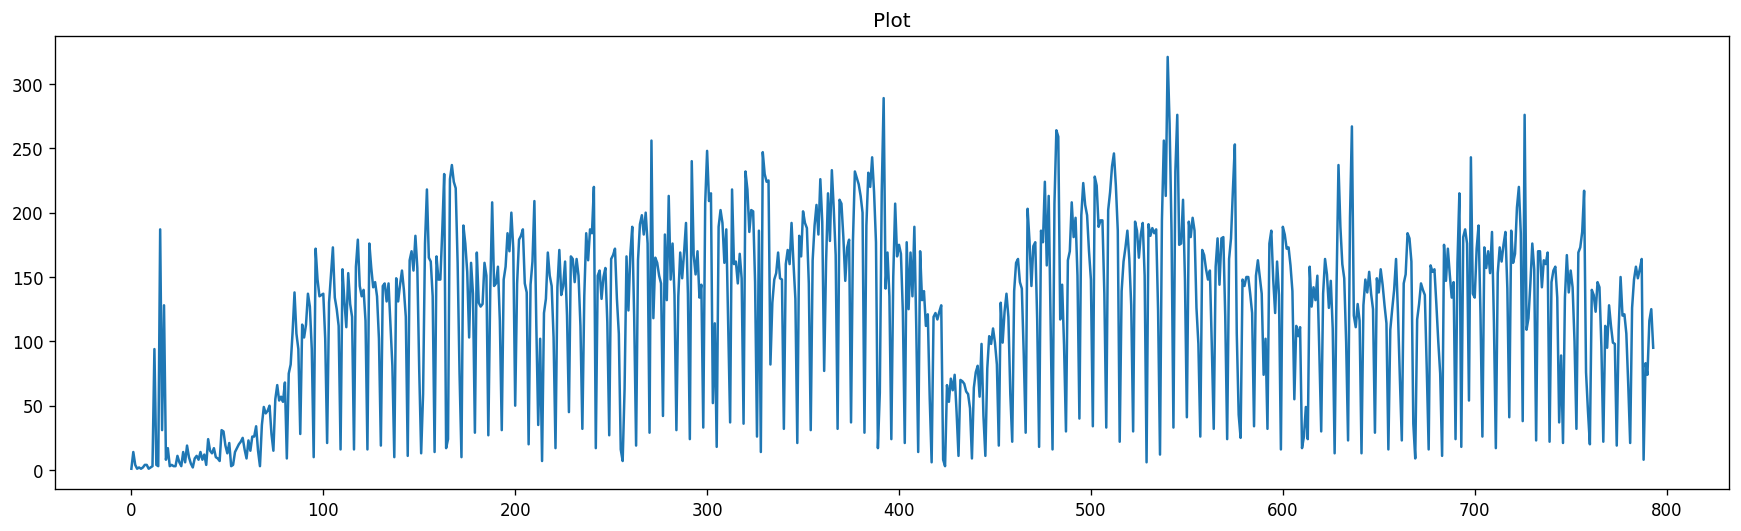

In [ ]:
#Creating Time Series Plot
plt.figure(figsize=(18,5))
plt.plot(date_tickets["description"])
plt.title("Plot")
plt.show()

In [ ]:
#No Trend 
#No Seasonality 
#No Cyclic component 
#Manual Analysis: Non-Stationary 
#Statistical Test - Hypothesis Testinf adfuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(date_tickets["description"])
print("ADF Statistic is: ",result[0])
print("p-value is: ",result[1])

ADF Statistic is:  -2.5630610747387443
p-value is:  0.10087461824113392


In [ ]:
#Null-Hypothesis - does not follow
#Alternate Hypothesis follow - Time Series is Non Stationary 
result

(-2.5630610747387443,
 0.10087461824113392,
 21,
 772,
 {'1%': -3.4388489336836003,
  '10%': -2.568767459327767,
  '5%': -2.865291103159288},
 7720.633022456812)

In [ ]:
#Applying Differencing - Convert Non Stationery to Stationery Time Series
#Autocorrelation - Determining  order of difference
#p-value>0.05 - timeseries is not stationary

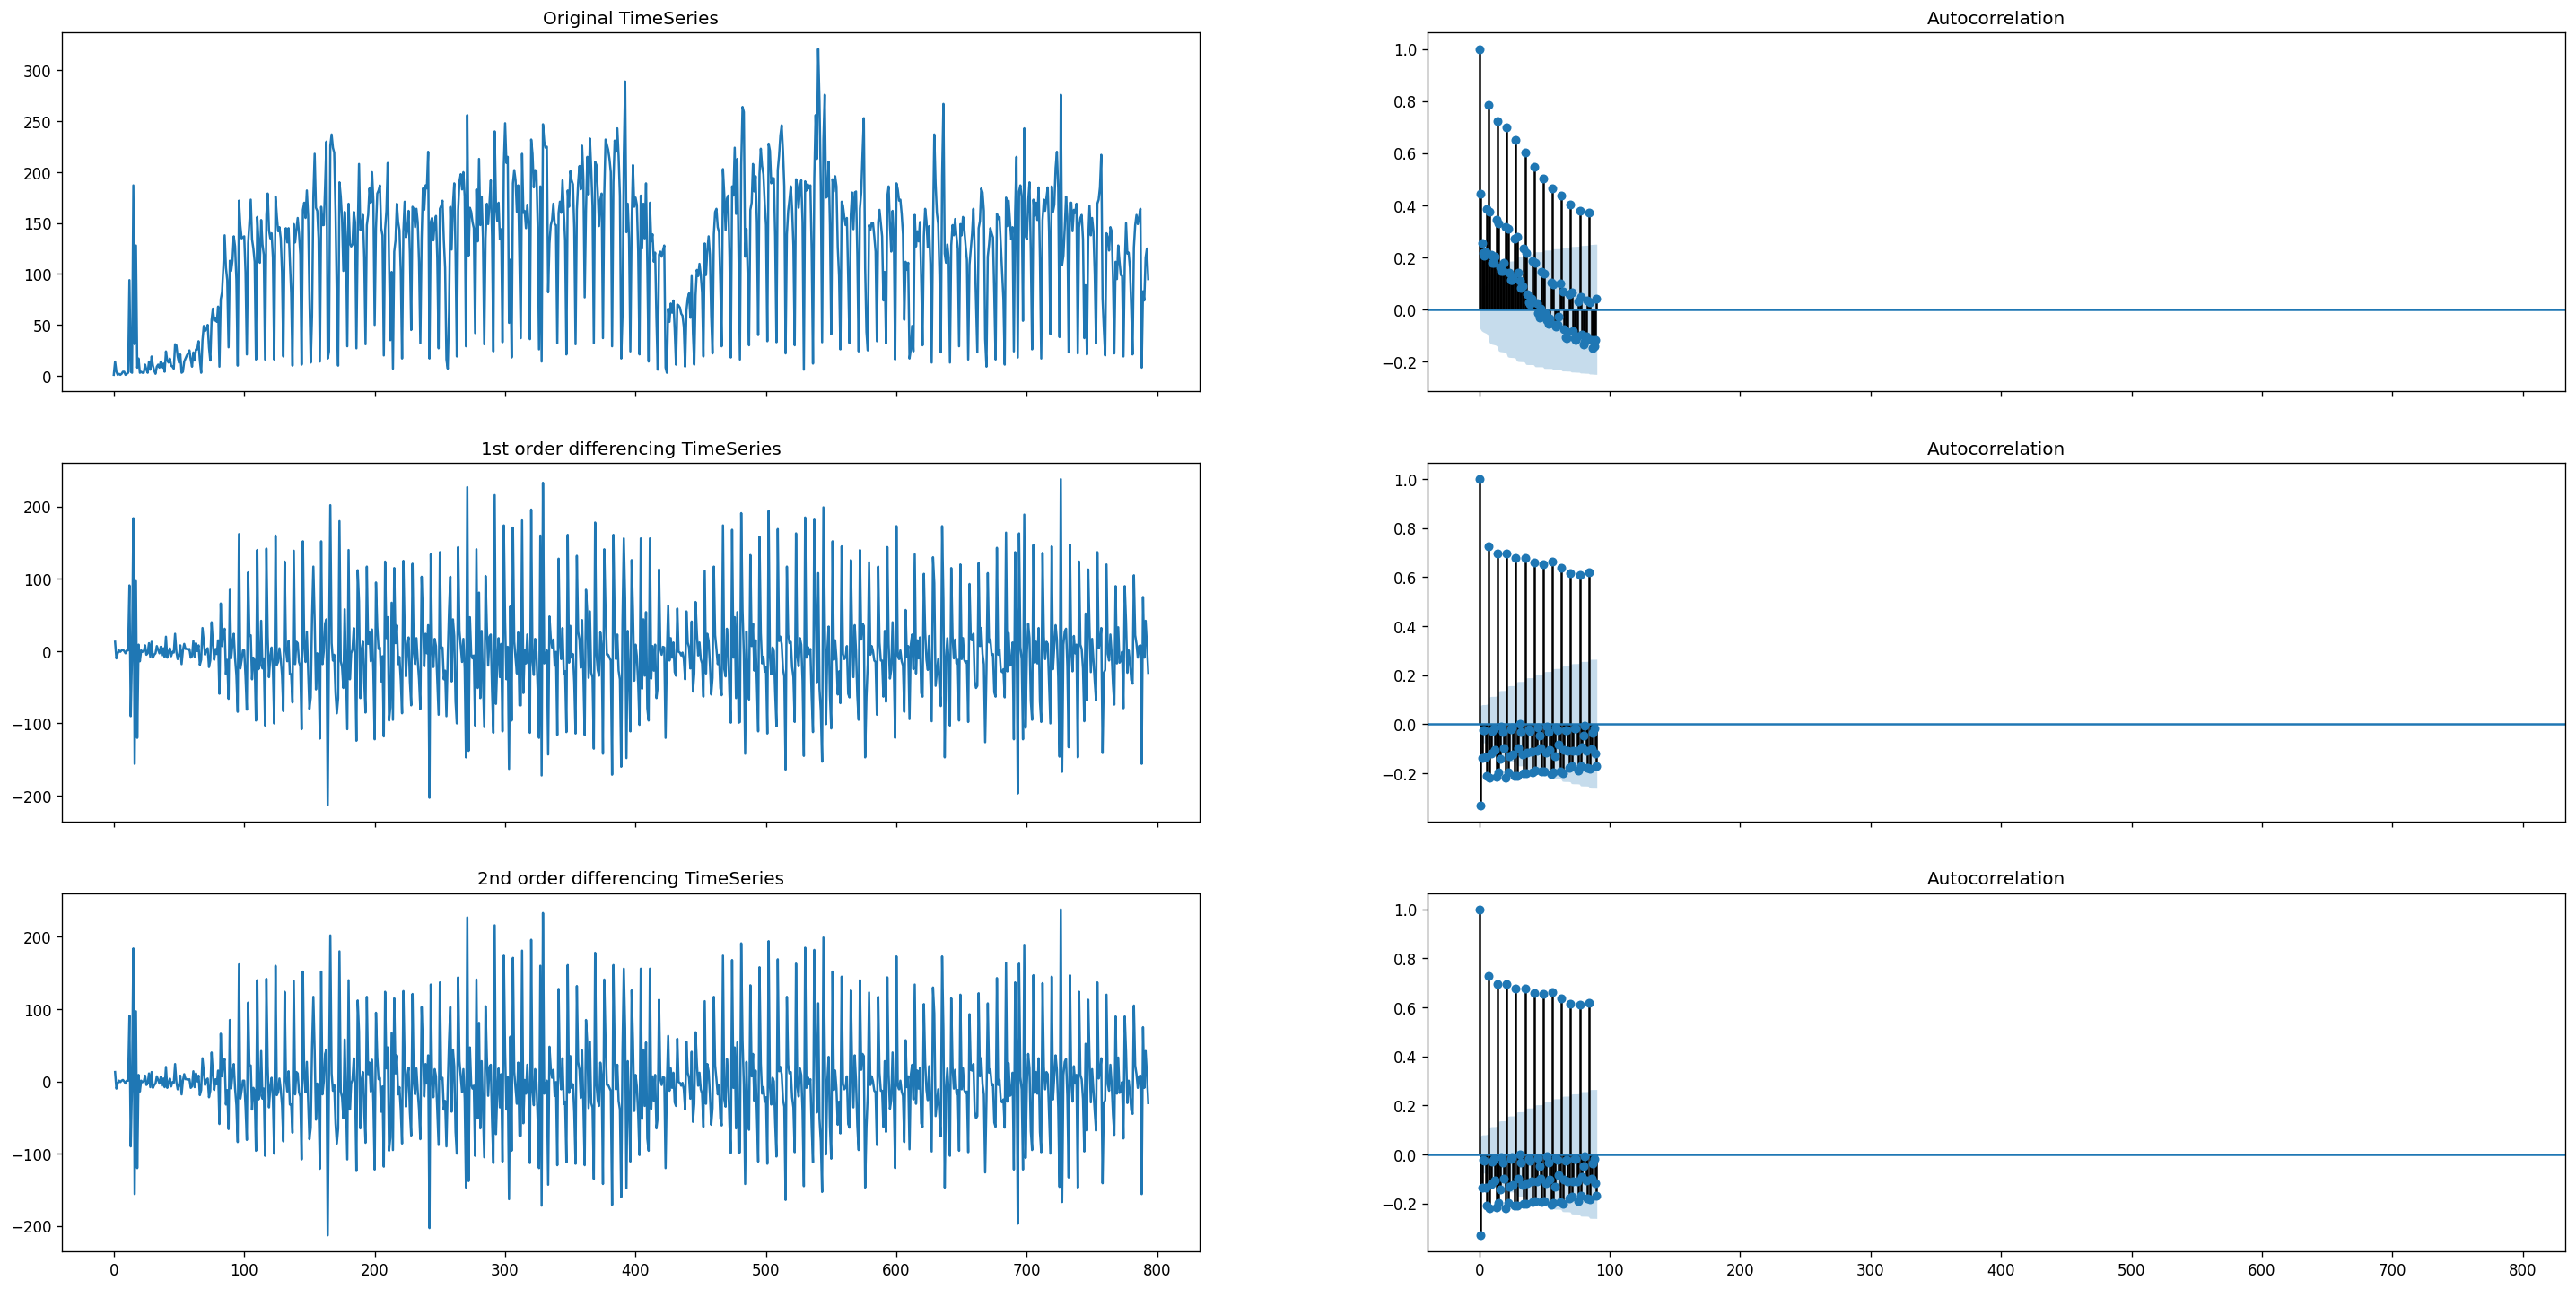

In [ ]:
# importing plot_acf from statsmodel

#figure & axis
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(30,15),'figure.dpi':120})
fig,axes=plt.subplots(3,2,sharex=True)

#original timeseries plot
axes[0,0].plot(date_tickets["description"])
axes[0,0].set_title("Original TimeSeries")
plot_acf(date_tickets["description"],lags=90,ax=axes[0,1])

#1st order differencing
axes[1,0].plot(date_tickets["description"].diff())
axes[1,0].set_title("1st order differencing TimeSeries")
plot_acf(date_tickets["description"].diff().dropna(),lags=90,ax=axes[1,1])


#2d order differencing
axes[2,0].plot(date_tickets["description"].diff())
axes[2,0].set_title("2nd order differencing TimeSeries")
plot_acf(date_tickets["description"].diff().dropna(),lags=90,ax=axes[2,1])

plt.show()

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima.utils import ndiffs

ImportError: ignored

In [ ]:
#Satistical measure of Order of difference
#Verify difference - 3 methods: kpss, adf and pp

In [ ]:
y = date_tickets["description"]
ndiffs(y,test = "kpss")

1

In [ ]:
ndiffs(y,test="adf")

0

In [ ]:
ndiffs(y,test="pp")

0

In [ ]:
#Determine model Parameters
from pmdarima import auto_arima

In [ ]:
model = auto_arima(date_tickets["description"], start_p=1, start_q=1,
                   test='adf',            #use adf test to find optimal d
                   max_p=5, max_q=5,      #maximum p and q
                   m=1,                   #frequency of series
                   d=None,                
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=8700.689, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10103.925, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=8994.063, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9547.734, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8682.050, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=8929.946, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=8665.990, Time=0.77 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=8880.925, Time=0.11 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=8649.855, Time=1.39 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=8852.779, Time=0.40 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=8612.620, Time=2.87 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=8826.506, Time=0.82 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=8652.263, Time=3.57 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=8708.943, Time=3.07 sec
 ARIMA(5,0,1)(0,0,0)[0] intercep

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  794
Model:               SARIMAX(5, 0, 1)   Log Likelihood               -4297.864
Date:                Sun, 17 Jul 2022   AIC                           8611.728
Time:                        16:49:48   BIC                           8649.145
Sample:                             0   HQIC                          8626.107
                                - 794                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1284      1.031      1.094      0.274      -0.892       3.149
ar.L1          1.0430      0.040     25.813      0.000       0.964       1.122
ar.L2         -0.2571      0.053     -4.837      0.0

In [ ]:
#p=5, d=0, q=1   
#Split data
#perform split keeping time series intact
train = date_tickets.iloc[:670]
test = date_tickets.iloc[670:]
train.head()

,posting_date,description
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


In [ ]:
train.shape

(670, 2)

In [ ]:
model = auto_arima(train["description"], start_p=1, start_q=1,
                   test='adf',            
                   max_p=5, max_q=5,     
                   m=1,                   
                   d=None,                
                   seasonal=False,
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7318.306, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7610.052, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7543.548, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7339.119, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7608.052, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7303.359, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7495.276, Time=0.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7288.860, Time=0.69 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7467.793, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7255.554, Time=0.90 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7441.507, Time=0.20 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=7168.007, Time=1.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=7346.778, Time=0.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=7048.818, Time=2.28 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  670
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -3479.971
Date:                Sun, 17 Jul 2022   AIC                           6983.941
Time:                        16:50:18   BIC                           7038.011
Sample:                             0   HQIC                          7004.886
                                - 670                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4288      1.189      0.361      0.718      -1.902       2.760
ar.L1          0.5649      0.093      6.078      0.000       0.383       0.747
ar.L2         -1.2526      0.075    -16.728      0.0

In [ ]:
model.fit(train["description"])

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True)

In [ ]:
test.shape

(124, 2)

In [ ]:
forecast, confidence_interval = model.predict(n_periods=124, return_conf_int=True, alpha=0.05)

In [ ]:
forecast

array([109.8696988 , 161.31184493, 141.23750441, 146.34300323,
       151.6149646 ,  75.41079143,  33.20383287, 108.11508034,
       162.42056334, 139.69384535, 145.43713268, 152.56649282,
        78.85964882,  37.5249282 , 110.75768312, 162.56918313,
       138.53106365, 144.60912846, 153.5446065 ,  82.19391049,
        41.69367721, 113.32288194, 162.77215616, 137.51000466,
       143.90428835, 154.53646599,  85.42222261,  45.71771805,
       115.81516836, 163.02671375, 136.62301605, 143.3158237 ,
       155.54121027,  88.55020934,  49.60485616, 118.2386506 ,
       163.33025807, 135.86285013, 142.83732001, 156.55803335,
        91.58319676,  53.36247363, 120.59720685, 163.68032336,
       135.22264894, 142.46271486, 157.58618116,  94.52622855,
        56.99755222, 122.89449809, 164.07456927, 134.69592336,
       142.18627861, 158.62494825,  97.384081  ,  60.51669501,
       125.13398025, 164.51077445, 134.27653322, 142.00259614,
       159.67367478, 100.16127713,  63.92614703, 127.31

In [ ]:
confidence_interval

array([[ 2.35236176e-01,  2.19504161e+02],
       [ 5.12719917e+01,  2.71351698e+02],
       [ 2.89763308e+01,  2.53498678e+02],
       [ 3.34520432e+01,  2.59233963e+02],
       [ 3.82982911e+01,  2.64931638e+02],
       [-3.84029128e+01,  1.89224496e+02],
       [-8.25229877e+01,  1.48930653e+02],
       [-1.14876036e+01,  2.27717764e+02],
       [ 3.98415417e+01,  2.84999585e+02],
       [ 1.57911360e+01,  2.63596555e+02],
       [ 2.08333912e+01,  2.70040874e+02],
       [ 2.75494639e+01,  2.77583522e+02],
       [-4.66413722e+01,  2.04360670e+02],
       [-8.96880949e+01,  1.64737951e+02],
       [-1.98728780e+01,  2.41388244e+02],
       [ 2.93036641e+01,  2.95834702e+02],
       [ 4.05816958e+00,  2.73003958e+02],
       [ 9.45569121e+00,  2.79762566e+02],
       [ 1.79698283e+01,  2.89119385e+02],
       [-5.38536026e+01,  2.18241424e+02],
       [-9.59140383e+01,  1.79301393e+02],
       [-2.73474307e+01,  2.53993195e+02],
       [ 1.97341207e+01,  3.05810192e+02],
       [-6.

In [ ]:
test["forecast"] = forecast
test["lower_range"] = confidence_interval[:,0]
test["upper_range"] = confidence_interval[:,1]
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,posting_date,description,forecast,lower_range,upper_range
670,2022-01-03,117,109.869699,0.235236,219.504161
671,2022-01-04,129,161.311845,51.271992,271.351698
672,2022-01-05,145,141.237504,28.976331,253.498678
673,2022-01-06,140,146.343003,33.452043,259.233963
674,2022-01-07,136,151.614965,38.298291,264.931638
...,...,...,...,...,...
789,2022-05-02,83,143.170350,-92.845854,379.186555
790,2022-05-03,74,170.009915,-66.999410,407.019240
791,2022-05-04,116,134.469249,-103.167048,372.105546
792,2022-05-05,125,143.764911,-94.477231,382.007052


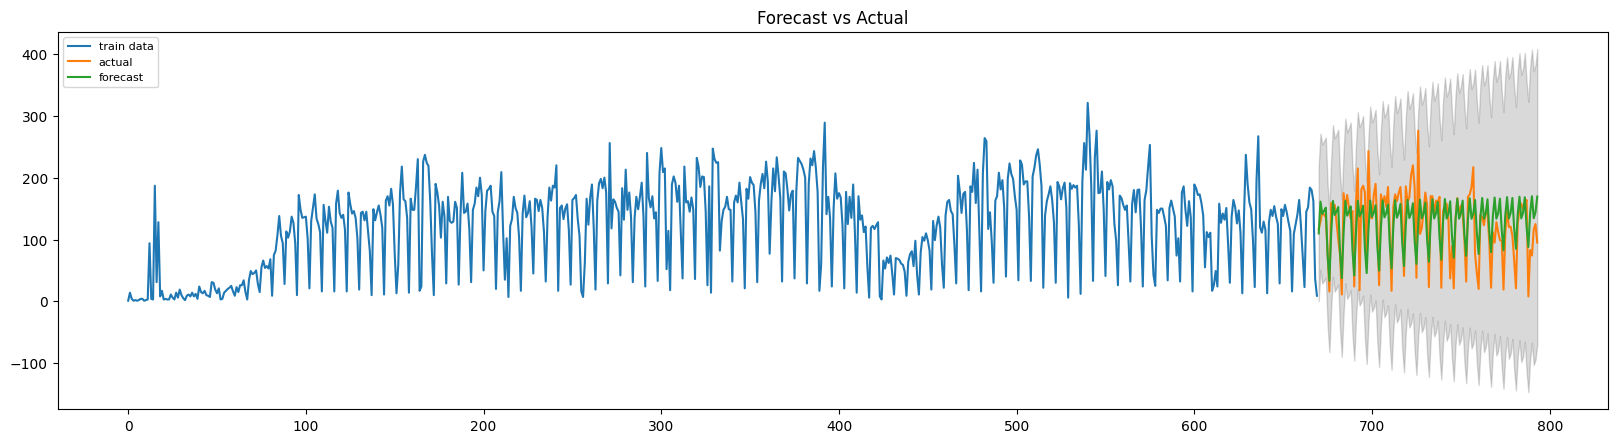

In [ ]:
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train["description"], label='train data')
plt.plot(test["description"], label='actual')
plt.plot(test["forecast"], label='forecast')
plt.fill_between(test.index, test["lower_range"], test["upper_range"], color='k', alpha=0.15)
plt.title('Forecast vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
#MAPE = Mean Absolute Percentage Error
from pmdarima.metrics import smape

In [ ]:
mpe = smape(test["description"], test["forecast"])
print("MPE is", mpe)

MPE is 33.97085924722436


In [ ]:
#model is 66% accurate